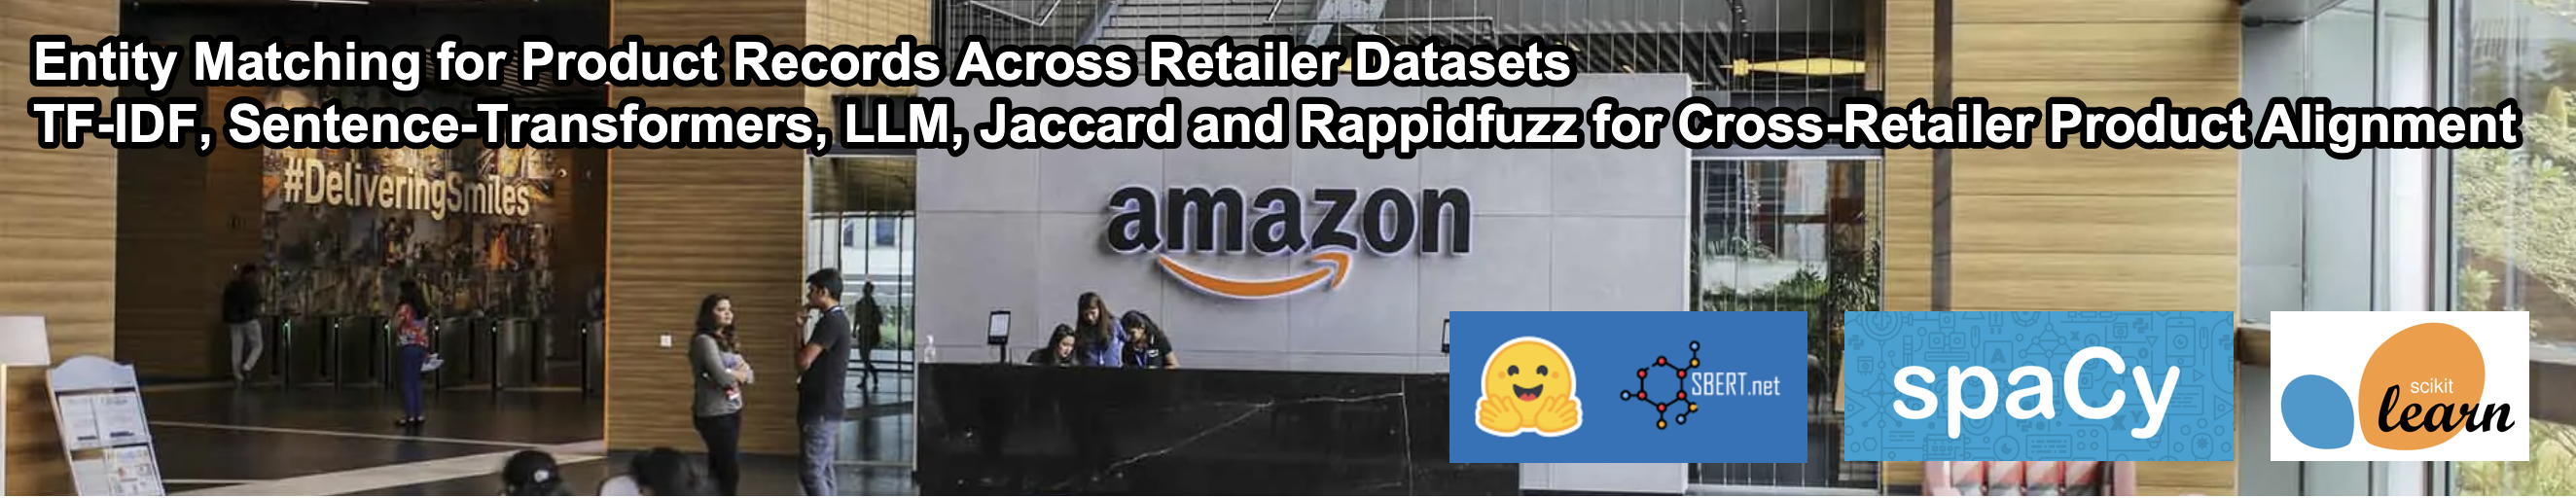
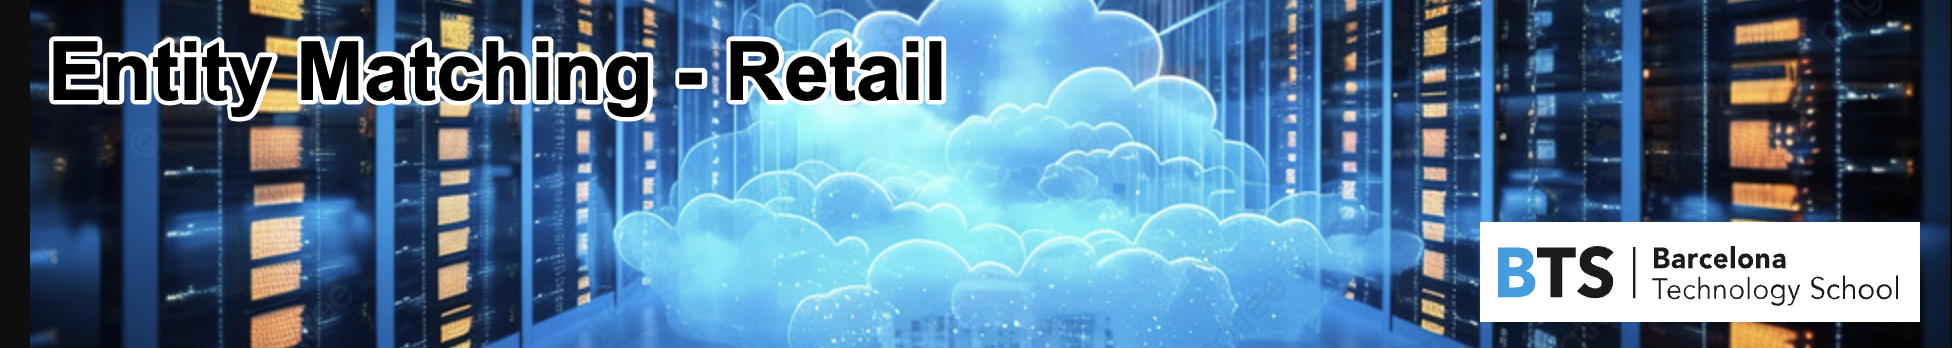

## Entity Matching
    
As a data scientist, you are working for **Retailer A**, a large-scale software products chain. Retailer A has recently entered into a strategic partnership with **Retailer B**, an online software product platform. As part of this partnership, Retailer B has shared its product dataset with Retailer A for the purpose of cross-promotion, product indexing and targeted marketing.

Your task is to perform **entity resolution**, also known as record linkage, on these datasets. The goal is to identify which products in Retailer B's dataset are also products of Retailer A. This will allow the marketing department to create more personalized product offering campaigns and product indexes.

Entity resolution can be a complex task due to various reasons such as data inconsistencies, missing values, and the need to protect customer privacy. It involves several steps including data cleaning, data standardization, and matching records.

You may find the datasets in CSV format:

    - DDB_retailerA.csv
    - DDB_retailerB.csv
    
Notes:

- Schema aligned
- Structured data (no large mess ups, void cells, etc ...)
- Blocking already performed

### Entity resolution

Data stored in information systems are often erroneous. The
most typical errors include: inconsistent, missing, and outdated
values, typos as well as duplicates. To handle data of poor quality,
data cleaning (a.k.a. curation) and deduplication (a.k.a. entity
resolution) methods are used in projects realized by research
and industry. This is of particular challenge due
to its computational complexity and the complexity of finding
the most adequate method for comparing records and computing
similarities of these records. The similarity value of two records
is a compound value, whose computation is based on similarities
of individual attribute values.


Recall that an ER pipeline includes four basic tasks, namely:
    
- Blocking (a.k.a. indexing) - it organizes records into groups,
such that each group includes records that may include
potential duplicates.

- Block processing (a.k.a. filtering) - its goal is to eliminate
records that do not have to be compared.

- **Entity matching** (a.k.a. similarity computation) - it computes similarity values between records compared in pairs,
i.e., a value of each attribute in one record is compared to
a value of a corresponding attribute in the second record.

- **Entity clustering** - it aims at creating groups of similar records, from pairs of records representing highly probable duplicates.


For simplicity, we are going to focus on entity matching and entity clustering. This is a fairly basic pipeline and it can be extended in many ways. For example, sophisticated pre-processing and matching algorithms can be used. Or thinking about how to scale the entity resolution (i.e. speeding up the process without sacrificying accuracy).



## Deliverable format and tests

To evaluate the assignment,we will use a python script (*ddb_entity_matching.py*) that takes a data folder containing 2 CSV datasets and outputs a single CSV file called "match_report.csv" with the format below. You may use jupyter notebook to play with you algortihmic solution or other entity matching tools. However, the final deliverable will contain the before mentioned script, this jupyter notebook and requirements.txt file with all the libraries.

It should work this way: python ddb_entity_matching.py -i retailer_data_folder/ -o match_report_file_path

- OUTPUT SCHEMA:

| retailerA_id | retailerB_id | match |   |   |
|--------------|--------------|-------|---|---|
| 571          | 946          | 0     |   |   |
| 574          | 2423         | 0     |   |   |
| 250          | 2839         | 0     |   |   |
| 1162         | 2109         | 1     |   |   |


## Step 1: Data cleaning

Perform data cleaning with the help of regex expressions, removal of stopwords and the tokenization of the documents/sentences or paragraphs. Things like casing, extra spaces, quotes and new lines can be ignored (not limited to that though).

spaCy provides a one-stop-shop for tasks commonly used in any NLP project, so they might have all these functionalities. It useful to explore other packages like NTLK, or build the cleaning steps yourself.


The recommended workflow is the following: Read in the CSV files and apply the data cleaning operations.

***Hint***: https://www.nltk.org/api/nltk.tokenize.html

In [1]:
import os
import pandas as pd

def load_data_from_folder(folder_path):
    """Load CSV files for Retailer A and B datasets from the specified folder."""
    retailerA_path = os.path.join(folder_path, 'DDB_retailerA.csv')
    retailerB_path = os.path.join(folder_path, 'DDB_retailerB.csv')

    if not os.path.exists(retailerA_path) or not os.path.exists(retailerB_path):
        raise FileNotFoundError("Both DDB_retailerA.csv and DDB_retailerB.csv must be present in the folder.")

    retailerA_df = pd.read_csv(retailerA_path)
    retailerB_df = pd.read_csv(retailerB_path)

    return retailerA_df, retailerB_df

In [2]:
retailerA_df, retailerB_df = load_data_from_folder('retailer_data_folder')
retailerA_df.head()

id                                               name  \
0   1                           learning quickbooks 2007   
1   2            superstart! fun with reading & writing!   
2   3                          qb pos 6.0 basic software   
3   4  math missions: the amazing arcade adventure (g...   
4   5                     production prem cs3 mac upgrad   

                                         description    manufacturer   price  
0                           learning quickbooks 2007          intuit   38.99  
1  fun with reading & writing! is designed to hel...             NaN    8.49  
2  qb pos 6.0 basic retail mngmt software. for re...          intuit  637.99  
3  save spectacle city by disrupting randall unde...             NaN   12.95  
4  adobe cs3 production premium mac upgrade from ...  adobe software  805.99

In [3]:
retailerB_df.head()

id                                              title  \
0   1    clickart 950 000 - premier image pack (dvd-rom)   
1   2   ca international - arcserve lap/desktop oem 30pk   
2   3   noah's ark activity center (jewel case ages 3-8)   
3   4  peachtree by sage premium accounting for nonpr...   
4   5                            singing coach unlimited   

                                         description  \
0                                                NaN   
1  oem arcserve backup v11.1 win 30u for laptops ...   
2                                                NaN   
3  peachtree premium accounting for nonprofits 20...   
4  singing coach unlimited - electronic learning ...   

                manufacturer   price  
0                 broderbund    0.00  
1        computer associates    0.00  
2         victory multimedia    0.00  
3              sage software  599.99  
4  carry-a-tune technologies   99.99

In [4]:
matching_labels = pd.read_csv('matching_labels.csv')
matching_labels.head()

retailerB_id  retailerA_id  label
0           572           947      0
1           575          2424      0
2           251          2840      0
3          1163          2110      1
4           742           359      1

In [5]:
import spacy
import re

# Load spaCy model 
# python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

def clean_text_spacy(text):
    if pd.isnull(text): # Handle Null values
        return ""
    text = text.lower() # Lowercase text
    #text = re.sub(r'[\\\"\\\']', '', text) 

    text = re.sub(r'[\"\'\-]', '', text)  # Remove quotes and dashes
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)  # Replace non-alphanumeric characters with space
    text = re.sub(r'\s+', ' ', text).strip()  # Collapse multiple spaces to a single space
    text = re.sub(r'\b[a-zA-Z]\b', '', text)  # Remove standalone single letters
    return text

In [6]:
def tokenize_and_lemmatize(text):
    text = clean_text_spacy(text) # Clean text
    doc = nlp(text) # Tokenize
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop and len(token) > 2] # Lemmatize, keep alphabetic tokens, filter stopwords, and remove short tokens (< 3 chars)

    cleaned_text = ' '.join(tokens) # Join tokens into clean string
    return cleaned_text

In [7]:
# Clean the 'name', 'description', and 'manufacturer' columns for Retailer A
retailerA_df['name'] = retailerA_df['name'].apply(clean_text_spacy)
retailerA_df['description'] = retailerA_df['description'].apply(tokenize_and_lemmatize)
retailerA_df['manufacturer'] = retailerA_df['manufacturer'].fillna('')  # Handle null values only

# Clean the 'title', 'description', and 'manufacturer' columns for Retailer B
retailerB_df['title'] = retailerB_df['title'].apply(clean_text_spacy)
retailerB_df['description'] = retailerB_df['description'].apply(tokenize_and_lemmatize)
retailerB_df['manufacturer'] = retailerB_df['manufacturer'].fillna('')  # Handle null values only


print("Data cleaning completed using spaCy and saved.")

Data cleaning completed using spaCy and saved.


In [10]:
retailerA_df.head()

id                                               name  \
0   1                           learning quickbooks 2007   
1   2                superstart fun with reading writing   
2   3                          qb pos 6 0 basic software   
3   4  math missions the amazing arcade adventure gra...   
4   5                     production prem cs3 mac upgrad   

                                         description    manufacturer   price  
0                                    learn quickbook          intuit   38.99  
1  fun read writing design help kid learn read wr...                    8.49  
2  pos basic retail mngmt software retailer need ...          intuit  637.99  
3  save spectacle city disrupt randall underling ...                   12.95  
4  adobe production premium mac upgrade productio...  adobe software  805.99

In [11]:
retailerB_df.head()

id                                              title  \
0   1         clickart 950 000 premier image pack dvdrom   
1   2     ca international arcserve lap desktop oem 30pk   
2   3       noahs ark activity center jewel case ages 38   
3   4  peachtree by sage premium accounting for nonpr...   
4   5                            singing coach unlimited   

                                         description  \
0                                                      
1             oem arcserve backup win laptop desktop   
2                                                      
3  peachtree premium account nonprofit affordable...   
4  singe coach unlimited electronic learning prod...   

                manufacturer   price  
0                 broderbund    0.00  
1        computer associates    0.00  
2         victory multimedia    0.00  
3              sage software  599.99  
4  carry-a-tune technologies   99.99

## Step 2: Entity Matching

For every product record in the retailer A, we need to compute its similarity to every record in retailer B- Think about the total number of comparisons you need to perform.

A very simple approach would be to use rule matching based on matches from regular expressions.Different measures can be used to process different attribute blocks, like using string a similarity metric like Levenshtein distance for names or Jaccard similarity to compare associated groups (say lists of friends on a social network, or a list of investments).

Very powerful techniques can also arise from fuzzy matching and string distance algorithms. One could also try, for example, computing text similarity among sentences/documents/paragraphs using different model or feature extractors, and then compute similarities based on vector distances (i.e. cosine,euclidean,jaccard ) similarity. You may use the following model (not restricted to though):

- **Bag of Words (BoW)** Scikit-Learn, NTLK
- **N-grams**: Scikit-Learn, NTLK
- **TF-IDF**: Scikit-Learn, NTLK
- **Word embedding models**: Word2Vec ( Spacy, Gensim are packages that have this functionality)
- **Pre-trained language models**: BERT and large language models

You could even feed these to an LLM (a small OSS model?). Think of computational cost! Either way, you’ll have to decide on a threshold for creating a link or not as well.


**Extra**: There are ways to avoid this large number of comparisons among entities, they involve sophisticated methods like inserting blocking pipelines. Research this area, only after you have completed all the steps, and as an. You can opt to save the intermediary files (i.e. pairwise similarity matrix) to disk to avoid computing this step every single time. There are also additional open source libraries in python that you may use for the end-to-end entity resolution or parts of it, exclusively dedicated  to ER: *RecordLinkage*, *dedupe*, *Zingg*.

The scale of the dataset is also not expected to demand this level of complexity.

### 1: Rappidfuzz
- Fast Approximate String Matching: It implements algorithms similar to FuzzyWuzzy but with significant performance improvements.
- Supports Levenshtein Distance Variants: Includes partial ratio, token sort ratio, and token set ratio.

In [12]:
#!pip install rapidfuzz
from rapidfuzz.fuzz import ratio, partial_ratio
from tqdm import tqdm

# Compute pairwise similarities
def compute_similarity(rowA, dfB):
    scores = []
    for _, rowB in dfB.iterrows():
        # Compute weighted similarity
        name_sim = ratio(rowA['name'], rowB['title']) / 100
        #desc_sim = partial_ratio(rowA['description'], rowB['description']) / 100
        manu_sim = ratio(rowA['manufacturer'], rowB['manufacturer']) / 100
        
        # Weighted similarity score
        score = 0.9 * name_sim + 0.1 * manu_sim
        scores.append((rowB['id'], score))
    return scores

# Define threshold for matches
THRESHOLD = 0.65

# Compute similarity for all records
matches = []
for _, rowA in tqdm(retailerA_df.iterrows(), total=retailerA_df.shape[0]):
    similarities = compute_similarity(rowA, retailerB_df)
    for retailerB_id, score in similarities:
        if score >= THRESHOLD:
            matches.append({'retailerA_id': rowA['id'], 'retailerB_id': retailerB_id, 'match': 1, 'score': score})
        else:
            matches.append({'retailerA_id': rowA['id'], 'retailerB_id': retailerB_id, 'match': 0, 'score': score})

# Save match report
match_report = pd.DataFrame(matches)
match_report.to_csv('match_report_rappidfuzz.csv', index=False)
print('Entity matching completed and saved.')


100%|██████████| 3226/3226 [01:44<00:00, 30.97it/s]


Entity matching completed and saved.


### 2: TF-IDF vectorization and cosine distance metric
Text similarity using TF-IDF vectorization and cosine distance metric.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combine relevant columns into a single text representation for matching
#retailerA_df['combined_text'] = retailerA_df['manufacturer'] + ' ' + retailerA_df['name']
#retailerB_df['combined_text'] = retailerB_df['manufacturer'] + ' ' + retailerB_df['title'] 

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the combined text from both datasets
tfidf_retailerA = tfidf_vectorizer.fit_transform(retailerA_df['name'])
tfidf_retailerB = tfidf_vectorizer.transform(retailerB_df['title'])

# Compute cosine similarity between all pairs
cosine_sim_matrix = cosine_similarity(tfidf_retailerA, tfidf_retailerB)

# Define a threshold for matching
similarity_threshold = 0.705

# Generate matching pairs
matches = []
for i in range(cosine_sim_matrix.shape[0]):
    for j in range(cosine_sim_matrix.shape[1]):
        match_flag = 1 if cosine_sim_matrix[i, j] >= similarity_threshold else 0
        matches.append({
            'retailerA_id': retailerA_df.iloc[i]['id'],
            'retailerB_id': retailerB_df.iloc[j]['id'],
            'match': match_flag,
        })

# Convert matches to a DataFrame and save to CSV
matches_df = pd.DataFrame(matches)
matches_df.to_csv('match_report_TF_IDF_product_name.csv', index=False)

print("TF-IDF + Cosine Similarity matching completed and saved to match_report_TF_IDF_product_name.csv.")

TF-IDF + Cosine Similarity matching completed and saved to match_report_TF_IDF_product_name.csv.


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combine relevant columns into a single text representation for matching
#retailerA_df['combined_text'] = retailerA_df['manufacturer'] + ' ' + retailerA_df['name']
#retailerB_df['combined_text'] = retailerB_df['manufacturer'] + ' ' + retailerB_df['title'] 

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the combined text from both datasets
tfidf_retailerA = tfidf_vectorizer.fit_transform(retailerA_df['name'])
tfidf_retailerB = tfidf_vectorizer.transform(retailerB_df['title'])

# Compute cosine similarity between all pairs
cosine_sim_matrix = cosine_similarity(tfidf_retailerA, tfidf_retailerB)

# Define a threshold for matching
similarity_threshold = 0.705

# Generate matching pairs
matches = []
for i in range(cosine_sim_matrix.shape[0]):
    for j in range(cosine_sim_matrix.shape[1]):
        match_flag = 1 if cosine_sim_matrix[i, j] >= similarity_threshold else 0
        matches.append({
            'retailerA_id': retailerA_df.iloc[i]['id'],
            'retailerB_id': retailerB_df.iloc[j]['id'],
            'match': match_flag,
            'similarity': cosine_sim_matrix[i, j],
        })

# Convert matches to a DataFrame and save to CSV
matches_df = pd.DataFrame(matches)
matches_df.to_csv('match_report_TF_IDF_product_name.csv', index=False)

print("TF-IDF + Cosine Similarity matching completed and saved to match_report_TF_IDF_product_name.csv.")

TF-IDF + Cosine Similarity matching completed and saved to match_report_TF_IDF_product_name.csv.


### 3: LLM approach
- Decision based on https://huggingface.co/spaces/mteb/leaderboard
- Good balance between performance and efficiency as well as quality


In [ ]:
# Install necessary packages
#!pip install sentence-transformers pandas

from sentence_transformers import SentenceTransformer, util

# Load pre-trained transformer model from Sentence-Transformers
model = SentenceTransformer('all-MiniLM-L6-v2')  # Using all-MiniLM-L6-v2 model

# Create a function to compute similarity score using the transformer model in batch
def compute_similarity_batch(textsA, textsB):
    # Encode both texts in batches
    embeddingsA = model.encode(textsA, convert_to_tensor=True, show_progress_bar=True)
    embeddingsB = model.encode(textsB, convert_to_tensor=True, show_progress_bar=True)

    # Compute cosine similarity between the two batches
    similarities = util.pytorch_cos_sim(embeddingsA, embeddingsB)

    return similarities

# Extract the preprocessed texts directly
retailerA_texts = retailerA_df['name'] + " " + retailerA_df['description'] + " " + retailerA_df['manufacturer']
retailerB_texts = retailerB_df['title'] + " " + retailerB_df['description'] + " " + retailerB_df['manufacturer']
#retailerA_texts = retailerA_df['manufacturer']+ " " + retailerA_df['name']
#retailerB_texts = retailerB_df['manufacturer'] + " " + retailerB_df['title']

# Compute similarity scores in batches
similarities = compute_similarity_batch(retailerA_texts.tolist(), retailerB_texts.tolist())

# Initialize an empty list for match report
match_report = []

# Define threshold for matching (e.g., similarity >= 0.8)
threshold = 0.73

# Loop through the similarity matrix and build match report
for idx_a, row_a in retailerA_df.iterrows():
    for idx_b, row_b in retailerB_df.iterrows():
        similarity = similarities[idx_a][idx_b].item()
        match_value = 1 if similarity >= threshold else 0  # 1 if match, 0 if not
        
        # If match, print the retailer IDs
        if match_value == 1:
            print(f"Match found! Retailer A ID: {row_a['id']} | Retailer B ID: {row_b['id']}")
        
        match_report.append({
            'retailerA_id': row_a['id'],
            'retailerB_id': row_b['id'],
            'match': match_value
        })

# Create DataFrame from the match report
match_report_df = pd.DataFrame(match_report)

# Save the result to CSV
match_report_df.to_csv('match_report_llm.csv', index=False)

print("Entity Matching completed. Matches are now recorded with 1 for match, 0 for non-match.")

Python(81954) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Batches:   7%|▋         | 3/43 [00:05<01:15,  1.88s/it]

### 4: Jaccard

In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import jaccard

# Function to compute Jaccard Similarity
def jaccard_similarity(list1, list2):
    set1 = set(list1.split())
    set2 = set(list2.split())
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union > 0 else 0

# Prepare the datasets for matching
#retailerA_df['combined_features'] = retailerA_df['name'] + " " + retailerA_df['description'] + " " + retailerA_df['manufacturer']
#retailerB_df['combined_features'] = retailerB_df['title'] + " " + retailerB_df['description'] + " " + retailerB_df['manufacturer']
retailerA_df['combined_features'] = retailerA_df['name'] + " " + retailerA_df['manufacturer']
retailerB_df['combined_features'] = retailerB_df['title'] + " " + retailerB_df['manufacturer']

# Initialize an empty list to store the results
match_results = []

# Perform Jaccard similarity between Retailer A and Retailer B records
for index_a, record_a in retailerA_df.iterrows():
    for index_b, record_b in retailerB_df.iterrows():
        similarity = jaccard_similarity(record_a['combined_features'], record_b['combined_features'])
        
        # Add all combinations to match results
        match_results.append({
            'retailerA_id': record_a['id'],
            'retailerB_id': record_b['id'],  # Ensure retailerB_id is an integer
            'match': 1 if similarity > 0.5 else 0
        })

# Convert results to a DataFrame and save to CSV
match_report_df = pd.DataFrame(match_results)
match_report_df.to_csv('match_report_jaccard.csv', index=False)

print("Entity Matching using Jaccard Similarity completed and saved to 'match_report_jaccard.csv'.")

Entity Matching using Jaccard Similarity completed and saved to 'match_report_jaccard.csv'.


## Step 3: Evaluation


The file "matching_labels.csv" contains the matched pairs, a value of 1/0 represents a true/false matched pair. You may use this to gauge the performance of your solution by identyfying hits and misses, and precision and recall. These only represent about 3/5 of the total pairs, so be aware of overfitting your solution as the rest will be used to grade your solution. Precision and recall will be used to evaluate your solution.

- Accuracy: Overall correctness of predictions.
- Precision: How many predicted positives were actually correct.
- Recall: How many actual positives were correctly identified.
- F1-Score: Balances precision and recall.
- Confusion Matrix: Breakdown of true positives, false positives, true negatives, and false negatives.

In [14]:
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

def evaluate_match_report(match_report_file, matching_labels_file='matching_labels.csv'):
    # Load the match report and ground truth labels
    match_report = pd.read_csv(match_report_file)
    matching_labels = pd.read_csv(matching_labels_file)

    # Merge on retailerA_id and retailerB_id
    evaluation_df = pd.merge(
        match_report,
        matching_labels,
        on=['retailerA_id', 'retailerB_id'],
        how='inner'
    )

    # Extract true labels and predicted matches
    y_true = evaluation_df['label']
    y_pred = evaluation_df['match']

    # Calculate essential metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    # Display the results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)

    # Visualize the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Save evaluation results to a file
    evaluation_df.to_csv('evaluation_results.csv', index=False)
    print("Evaluation results saved.")

Accuracy: 0.8587
Precision: 0.3475
Recall: 0.4435
F1-Score: 0.3897
Confusion Matrix:
[[5593  582]
 [ 389  310]]


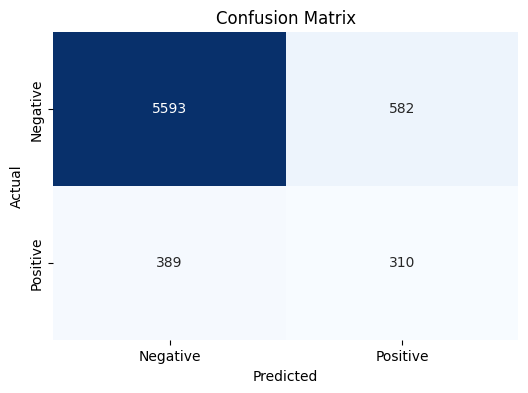

Evaluation results saved.


In [15]:
evaluate_match_report('match_report_rappidfuzz.csv')

Accuracy: 0.8897
Precision: 0.4664
Recall: 0.5851
F1-Score: 0.5190
Confusion Matrix:
[[5707  468]
 [ 290  409]]


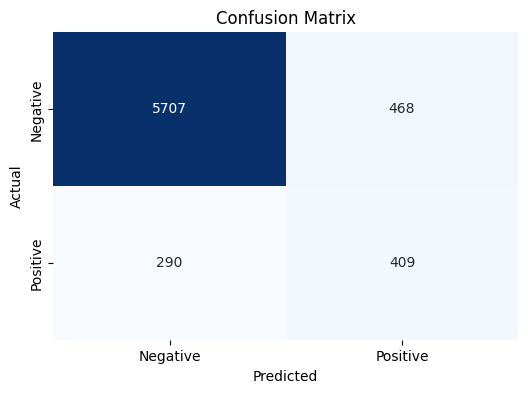

Evaluation results saved.


In [16]:
evaluate_match_report('match_report_TF_IDF_product_name.csv')

Accuracy: 0.8977
Precision: 0.4973
Recall: 0.5179
F1-Score: 0.5074
Confusion Matrix:
[[5809  366]
 [ 337  362]]


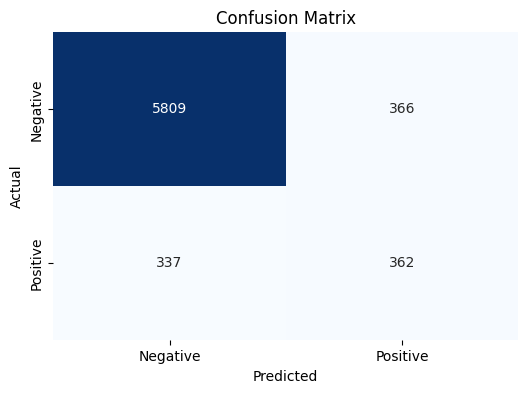

Evaluation results saved.


In [115]:
evaluate_match_report('match_report_TF_IDF_manufacturer_product_name.csv')

Accuracy: 0.8855
Precision: 0.4319
Recall: 0.3991
F1-Score: 0.4149
Confusion Matrix:
[[5808  367]
 [ 420  279]]


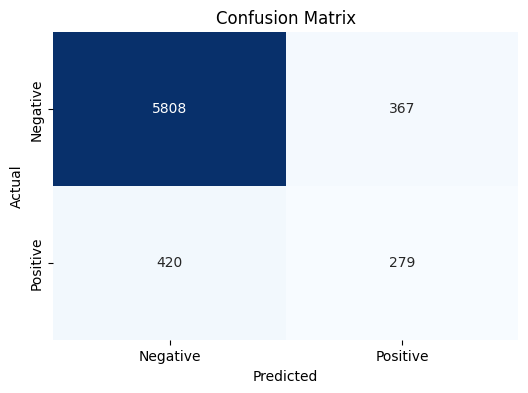

Evaluation results saved.


In [150]:
evaluate_match_report('match_report_llm.csv')

Accuracy: 0.8871
Precision: 0.4508
Recall: 0.5050
F1-Score: 0.4764
Confusion Matrix:
[[5745  430]
 [ 346  353]]


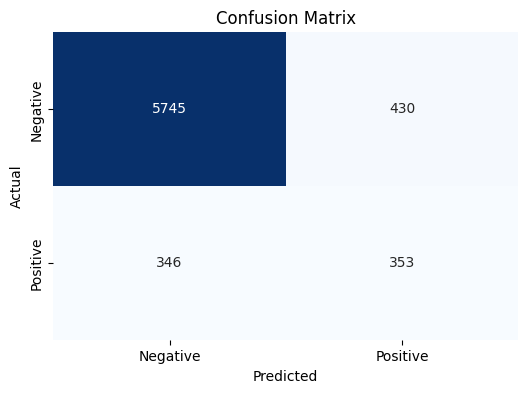

Evaluation results saved.


In [152]:
evaluate_match_report('match_report_jaccard.csv')

**Based on the results the best approach was the TF-IDF vectorization with cosine distance metric just based on the title and name.**

## Step 4: Entity clustering

Once entities have been resolved as matches. we need to  merge them in order to produce a single representative record. This involves grouping the entities based on the similarity scores. Entities or records in the same cluster are considered to be the same.

*Hint: You can use different clustering algorithms, but graph clustering algorithms are the most suitable approach. Think that the output of the entity mathcing stage can be a similarity graph or matrix, you may use tools such as networkX package to apply the needed transformations*



In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [53]:
# Too keep visualizations simple, we will only consider matches with a similarity score above a certain threshold
SIMILARITY_THRESHOLD = 1 

In [54]:
# Load matching results from the TF-IDF + Cosine Similarity stage
matches_df = pd.read_csv("match_report_TF_IDF_product_name.csv")

# Convert retailer IDs safely by removing any trailing decimals if they are floats
matches_df['retailerA_id'] = matches_df['retailerA_id'].apply(lambda x: int(float(x)))
matches_df['retailerB_id'] = matches_df['retailerB_id'].apply(lambda x: int(float(x)))

matched_pairs = matches_df[matches_df['similarity'] >= SIMILARITY_THRESHOLD]

# Initialize graph for clustering
G = nx.Graph()

# Add nodes for each unique record in Retailer A and Retailer B
retailerA_nodes = matched_pairs['retailerA_id'].unique()
retailerB_nodes = matched_pairs['retailerB_id'].unique()

# Add labeled nodes to graph
G.add_nodes_from([(f"A_{node}", {"source": "RetailerA"}) for node in retailerA_nodes])
G.add_nodes_from([(f"B_{node}", {"source": "RetailerB"}) for node in retailerB_nodes])

# Add weighted edges for matched pairs
for _, row in matched_pairs.iterrows():
    G.add_edge(f"A_{row['retailerA_id']}", f"B_{row['retailerB_id']}", weight=row['similarity'])

# Extract connected components as clusters
clusters = list(nx.connected_components(G))

# Create a DataFrame to store cluster results
clustered_records = []
for cluster_id, cluster_nodes in enumerate(clusters, start=1):
    for node in cluster_nodes:
        clustered_records.append({'node': node, 'cluster_id': cluster_id})

clusters_df = pd.DataFrame(clustered_records)
clusters_df.to_csv("entity_clusters.csv", index=False)
print("Entity clustering completed and saved to entity_clusters.csv.")

Entity clustering completed and saved to entity_clusters.csv.


/var/folders/xf/4sdwstz12kv6j1twjsxj9dz80000gn/T/ipykernel_81998/905836161.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('rainbow', len(unique_clusters))


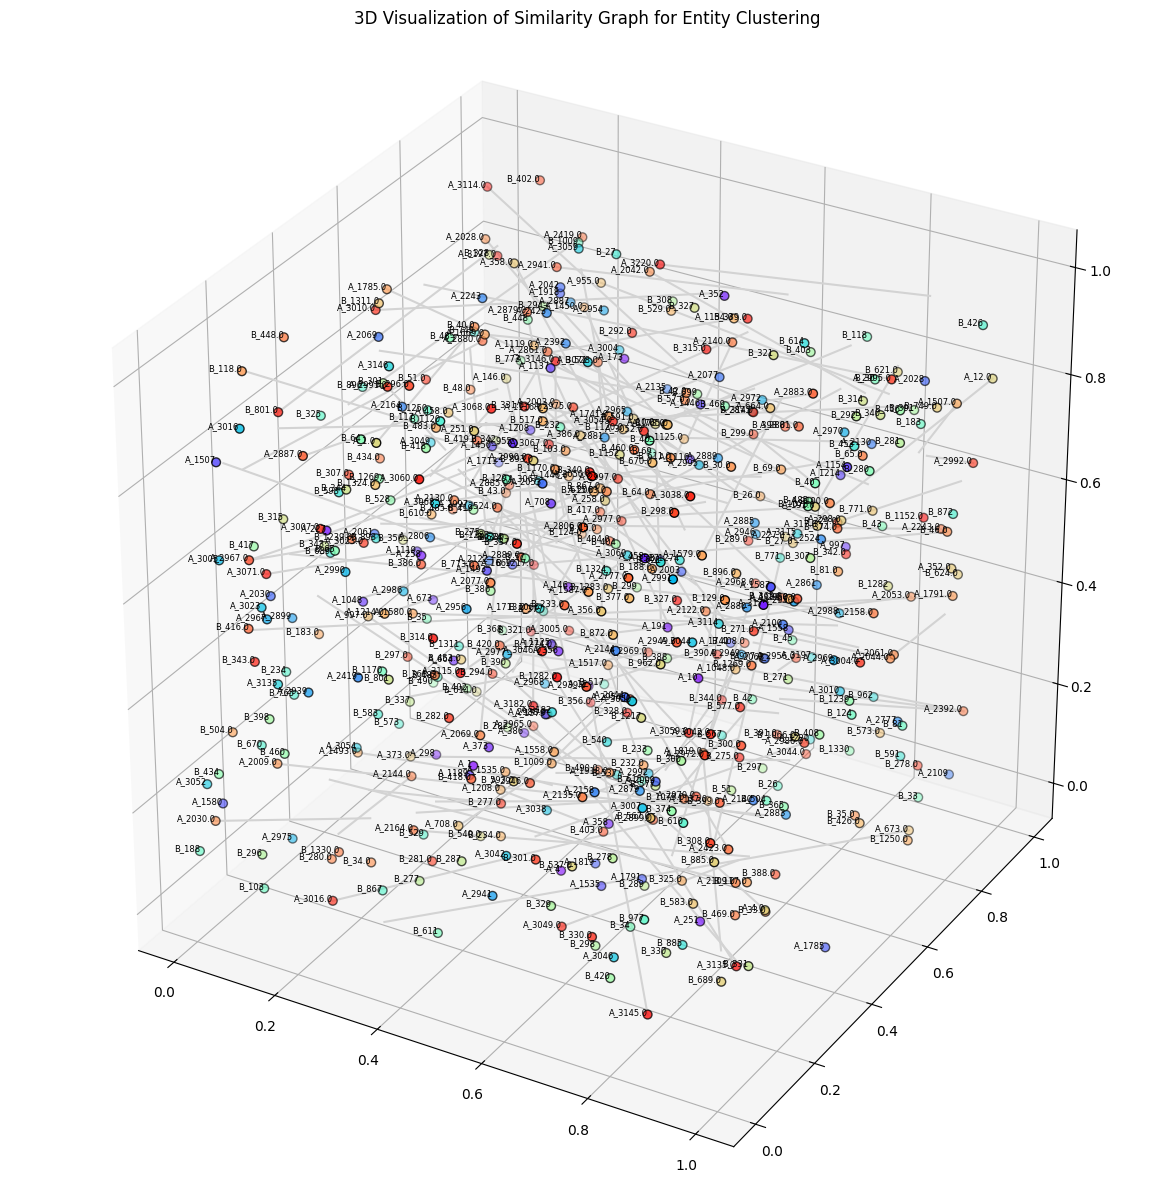

In [55]:
# Visualization 1: 3D Visualization of Similarity Graph
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Generate 3D positions for nodes
pos_3d = {node: (np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)) for node in G.nodes()}

# Extract node positions and labels
xs, ys, zs = zip(*[pos_3d[node] for node in G.nodes()])

# Assign colors to clusters
unique_clusters = clusters_df['cluster_id'].unique()
colors = cm.get_cmap('rainbow', len(unique_clusters))
cluster_color_map = {cluster_id: colors(i / len(unique_clusters)) for i, cluster_id in enumerate(unique_clusters)}
node_colors = [cluster_color_map[clusters_df.loc[clusters_df['node'] == node, 'cluster_id'].values[0]] for node in G.nodes()]

# Plot nodes with colors based on clusters
ax.scatter(xs, ys, zs, c=node_colors, s=40, edgecolors='k', label='Nodes')

# Plot edges
for u, v, d in G.edges(data=True):
    x_vals = [pos_3d[u][0], pos_3d[v][0]]
    y_vals = [pos_3d[u][1], pos_3d[v][1]]
    z_vals = [pos_3d[u][2]]
    ax.plot(x_vals, y_vals, z_vals, c='lightgrey')

# Add labels
for node, (x, y, z) in pos_3d.items():
    ax.text(x, y, z, f'{node}', fontsize=6, ha='right')

ax.set_box_aspect([1.5, 1.5, 1.5])
ax.set_title("3D Visualization of Similarity Graph for Entity Clustering")
plt.show()

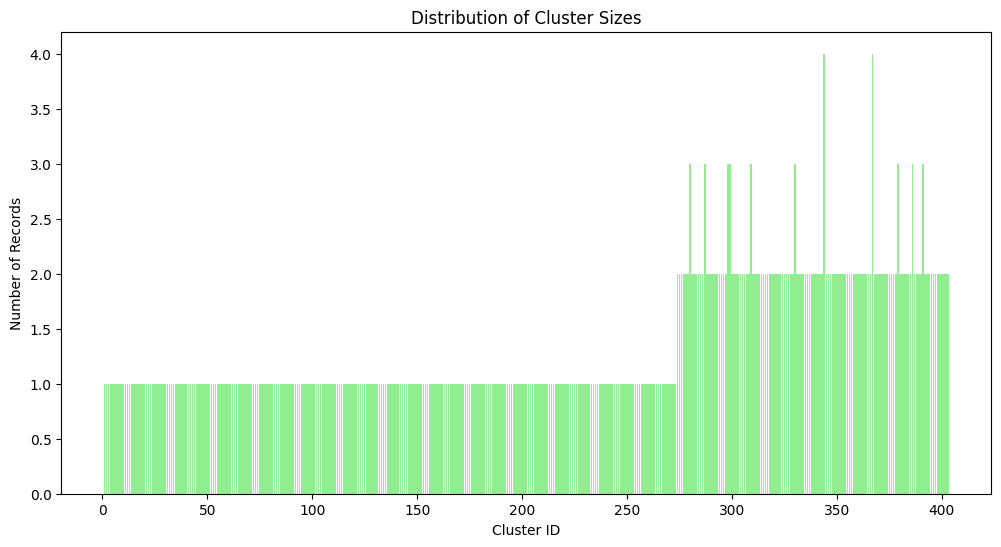

In [56]:
# Visualization 2: Distribution of Cluster Sizes
cluster_sizes = clusters_df.groupby('cluster_id').size().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(cluster_sizes.index, cluster_sizes.values, color='lightgreen')
plt.title("Distribution of Cluster Sizes")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Records")
plt.show()

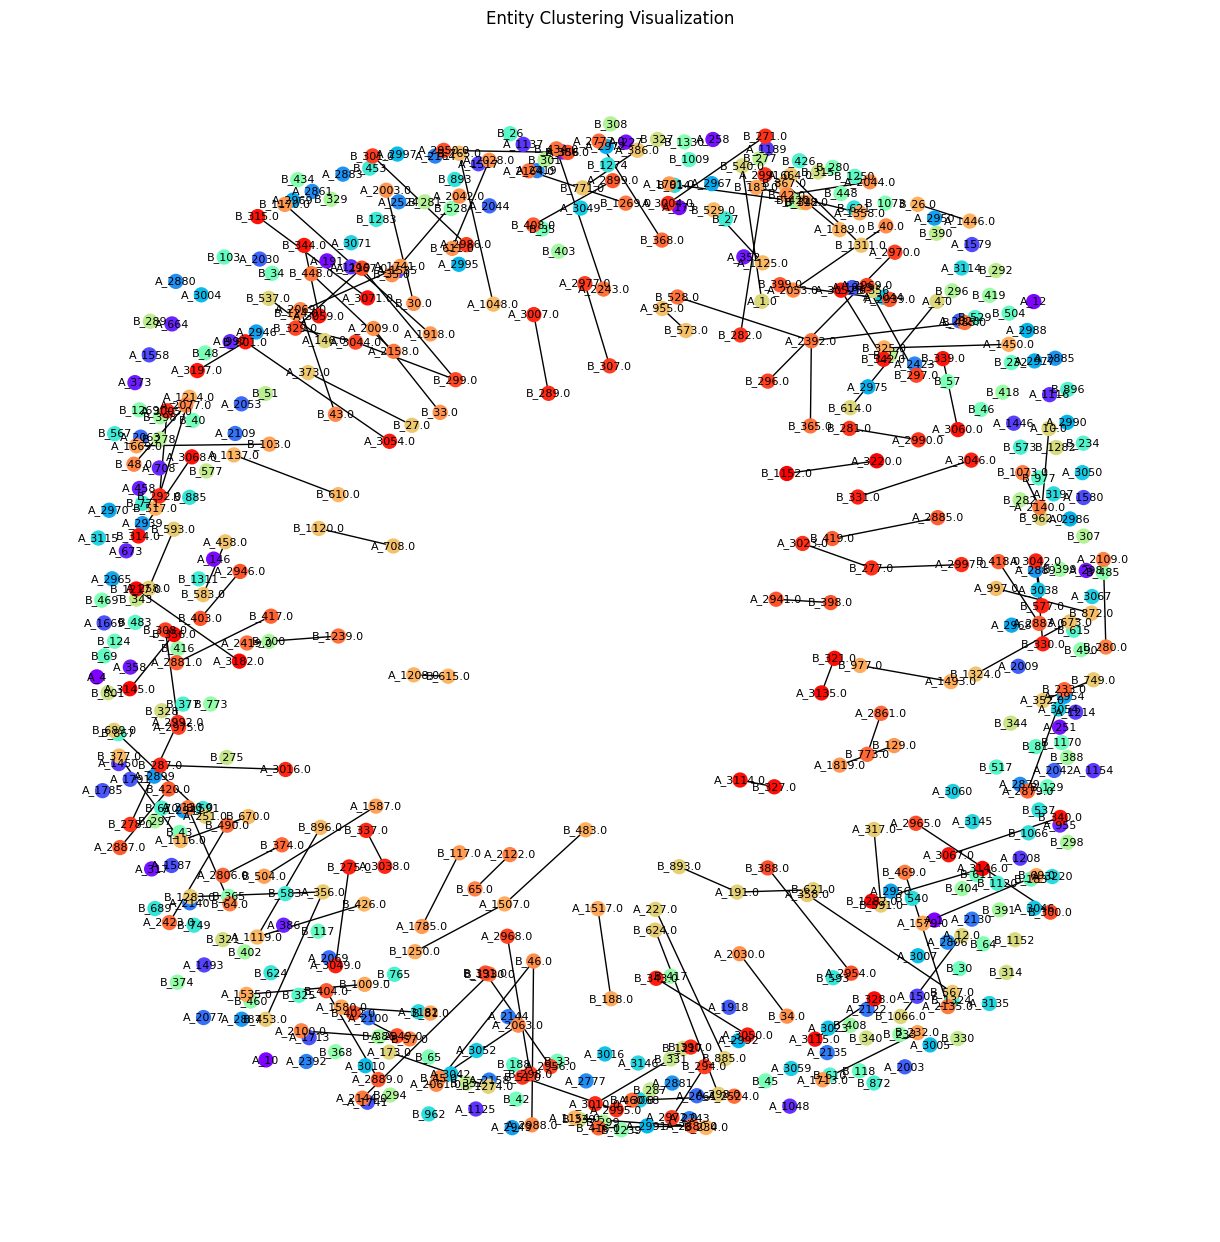

In [51]:
# Visualization 3: 2D Graph Visualization with Clusters
colors = plt.cm.rainbow([i / len(clusters) for i in range(len(clusters))])
node_color_map = {node: colors[i] for i, cluster in enumerate(clusters) for node in cluster}

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15, iterations=30)
nx.draw(G, pos, with_labels=True, node_size=100, font_size=8, node_color=[node_color_map[node] for node in G.nodes()])
plt.title("Entity Clustering Visualization")
plt.show()